## **Segmentação de Usuários / Customer Segmentation:**
### Using RFM Model and K-means Clustering

**Clara Álvares Camargo**  
Novembro/2024 

###### DASHBOARD: https://public.tableau.com/views/EverythingPlusData_SalesAnalysisandCustomerBehavior/Painel1?:language=pt-BR&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## 0. Bibliotecas

In [1]:
# importando bibliotecas

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [2]:
# importando bibliotecas

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

## 1. Dados

### 1.0. Resumo dos dados

Histórico de transações da **Everything Plus**.  
  
**Fonte**: 'ecommerce_dataset_us.csv' 
   
**Composição**:  
    `InvoiceNo` — identificador de pedido  
    `StockCode` — identificador de item  
    `Description` — nome de item  
    `Quantity`  
    `InvoiceDate` — data do pedido  
    `UnitPrice` — preço por item  
    `CustomerID`  
      
**Período**: 2018-11-29 a 2019-12-07 (AAAA-MM-DD)

### 1.1. Importação e visualização dos dados

In [3]:
# importando dados 
customers_data_raw = pd.read_csv("ecommerce_dataset_us.csv", sep="\t")

### 1.2. EDA

#### 1.2.1. Visualização dos dados

In [4]:
# visualizando dados
customers_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [5]:
# visualizando dados
customers_data_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [6]:
# visualizando dados
customers_data_raw.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
199742,554102,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,2,05/20/2019 13:40,2.10,14647.0
44253,540163,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,24,01/03/2019 11:52,0.95,13089.0
388505,570442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,10/08/2019 14:37,2.95,16549.0
9519,537204,20733,GOLD MINI TAPE MEASURE,3,12/03/2018 14:45,0.85,15555.0
156326,550131,22982,PANTRY PASTRY BRUSH,12,04/12/2019 13:27,1.25,15935.0
389311,570466,23372,SET 36 COLOUR PENCILS DOLLY GIRL,3,10/08/2019 16:03,1.25,16791.0
83068,543281,85170B,SET/6 BLACK BIRD T-LIGHT CANDLES,1,02/04/2019 15:34,2.10,14606.0
166502,550925,22781,GUMBALL MAGAZINE RACK,2,04/19/2019 14:37,7.65,17061.0
70315,542003,21561,DINOSAUR LUNCH BOX WITH CUTLERY,60,01/23/2019 11:07,2.10,15311.0
331124,565971,23201,JUMBO BAG ALPHABET,2,09/06/2019 11:27,2.08,13571.0


In [7]:
# visualizando dados
customers_data_raw.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/07/2019 12:50,4.95,12680.0


#### 1.2.2. Tratamento dos dados

###### **Valores ausentes**

In [8]:
# contando dados ausentes na coluna 'CustomerID'
customers_data_raw['CustomerID'].isnull().sum()

135080

In [9]:
# excluindo linhas onde 'CustomerID' contém valores nulos
customers_data_raw = customers_data_raw.dropna(subset=['CustomerID'])

In [10]:
# contando dados ausentes na coluna 'CustomerID'
customers_data_raw['CustomerID'].isnull().sum()

0

###### **Valores duplicados**

In [11]:
# contando linhas duplicadas
customers_data_raw.duplicated().sum()

5225

In [12]:
# filtrando DataFrame apenas com linhas duplicadas
duplicates = customers_data_raw[customers_data_raw.duplicated(keep=False)]

In [13]:
# visualizando linhas duplicadas
duplicates.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,11/29/2018 11:49,2.95,17920.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,11/29/2018 11:49,2.95,17920.0


In [14]:
# visualizando linhas duplicadas para 'InvoiceNo' == '536409'
linhas_invoice_536409 = duplicates[duplicates['InvoiceNo'] == '536409']
linhas_invoice_536409

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0


In [15]:
# visualizando linhas duplicadas para 'InvoiceNo' == '536412'
linhas_invoice_536412 = duplicates[duplicates['InvoiceNo'] == '536412']
linhas_invoice_536412

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,11/29/2018 11:49,2.95,17920.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,11/29/2018 11:49,2.95,17920.0
556,536412,22273,FELTCRAFT DOLL MOLLY,1,11/29/2018 11:49,2.95,17920.0
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,11/29/2018 11:49,1.65,17920.0
569,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,11/29/2018 11:49,3.75,17920.0
574,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,11/29/2018 11:49,2.10,17920.0
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,11/29/2018 11:49,1.65,17920.0
587,536412,22273,FELTCRAFT DOLL MOLLY,1,11/29/2018 11:49,2.95,17920.0
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,11/29/2018 11:49,3.75,17920.0
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,11/29/2018 11:49,2.10,17920.0


In [16]:
# deletando linhas duplicadas (mantendo a primeira ocorrência)
customers_data_raw = customers_data_raw.drop_duplicates(keep='first')

In [17]:
# contando linhas duplicadas
customers_data_raw.duplicated().sum()

0

###### **Tipos de dados**

In [18]:
# conertendo tipo de dados da coluna 'CustomerID' de 'float' para 'int'
customers_data_raw['CustomerID'] = customers_data_raw['CustomerID'].astype(int)

In [19]:
# convertendo tipo de dados da coluna 'InvoiceDate' para 'datetime'
customers_data_raw['InvoiceDate'] = pd.to_datetime(customers_data_raw['InvoiceDate'])

#### 1.2.3. Avaliação das variáveis e tratamento dos dados

##### 1.2.3.1. Consistência dos dados

###### **InvoiceNo**

In [20]:
# visualizando linhas onde 'InvoiceNo' contém informação além de números
InvoiceNo_letters = customers_data_raw[customers_data_raw['InvoiceNo'].str.contains(r'[A-Za-z]', na=False)]
InvoiceNo_letters.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2018-11-29 10:24:00,3.45,17548
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2018-11-29 10:24:00,1.65,17548
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2018-11-29 10:24:00,1.65,17548
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2018-11-29 12:38:00,4.25,17897


###### **StockCode**

In [21]:
# contando número de valores unívocos para 'StockCode'
customers_data_raw['StockCode'].nunique()

3684

In [22]:
# visualizando linhas onde 'StockCode' contém apenas letras
StockCode_letters = customers_data_raw[customers_data_raw['StockCode'].str.fullmatch(r'[A-Za-z]+', na=False)]
StockCode_letters.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
324002,565383,DOT,DOTCOM POSTAGE,1,2019-08-31 15:45:00,16.46,14096
39000,539607,POST,POSTAGE,5,2018-12-18 14:10:00,18.00,12681
491783,578074,M,Manual,1,2019-11-20 16:06:00,1.25,17590
190485,553195,POST,POSTAGE,1,2019-05-13 13:45:00,18.00,12599
479097,577135,POST,POSTAGE,2,2019-11-16 08:56:00,18.00,12427
34300,539330,POST,POSTAGE,3,2018-12-15 09:38:00,40.00,12370
28007,538597,M,Manual,1,2018-12-11 12:26:00,1.25,15555
186699,552878,POST,POSTAGE,8,2019-05-10 09:54:00,18.00,12625
334746,566268,POST,POSTAGE,3,2019-09-09 13:38:00,18.00,13813
418053,572682,M,Manual,72,2019-10-23 13:52:00,0.39,17928


In [23]:
# visualizando valores unívocos de 'StockCode' não numéricos
StockCode_letters['StockCode'].unique()

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [24]:
# excluindo linhas presentes em 'StockCode_letters' do DataFrame original
customers_data_raw = customers_data_raw[~customers_data_raw['StockCode'].str.fullmatch(r'[A-Za-z]+', na=False)]

In [25]:
# contando número de valores unívocos para 'StockCode' após limpeza do DataFrame
customers_data_raw['StockCode'].nunique()

3678

###### **Quantity**

In [26]:
# visualizando variável 'Quantity'
customers_data_raw['Quantity'].describe()

count    399835.00000
mean         12.22528
std         250.79115
min      -80995.00000
25%           2.00000
50%           5.00000
75%          12.00000
max       80995.00000
Name: Quantity, dtype: float64

In [27]:
# filtrando linhas onde 'Quantity' tem valor negativo
neg_quantity = customers_data_raw[customers_data_raw['Quantity'] < 0]
neg_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2018-11-29 10:24:00,3.45,17548
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2018-11-29 10:24:00,1.65,17548
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2018-11-29 10:24:00,1.65,17548
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2018-11-29 12:38:00,4.25,17897
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2018-11-29 14:30:00,2.10,17841


In [28]:
# visualizando compras de usuários com ocorrência de "Quantity" negativo 
neg_filt_17548 = customers_data_raw[(customers_data_raw['StockCode']=='22556')&(customers_data_raw['CustomerID']==17548)]
neg_filt_17548

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548


In [29]:
# visualizando compras de usuários com ocorrência de "Quantity" negativo 
neg_filt_15311 = customers_data_raw[(customers_data_raw['StockCode']=='35004C')&(customers_data_raw['CustomerID']==15311)]
neg_filt_15311

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2018-12-03 13:55:00,4.65,15311
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-12-06 13:18:00,4.65,15311
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2018-12-11 15:07:00,4.65,15311
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2018-12-18 15:27:00,4.65,15311
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2019-01-03 11:41:00,4.65,15311
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2019-01-15 13:39:00,4.65,15311
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2019-01-30 12:14:00,4.65,15311


In [30]:
# visualizando compras de usuários com ocorrência de "Quantity" negativo 
neg_filt_15073 = customers_data_raw[(customers_data_raw['StockCode']=='22680')&(customers_data_raw['CustomerID']==15073)]
neg_filt_15073

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
214615,555591,22680,FRENCH BLUE METAL DOOR SIGN 5,10,2019-06-04 09:59:00,1.25,15073
214901,C555636,22680,FRENCH BLUE METAL DOOR SIGN 5,-10,2019-06-04 12:33:00,1.25,15073
216100,555819,22680,FRENCH BLUE METAL DOOR SIGN 5,10,2019-06-05 12:00:00,1.25,15073


In [31]:
# criando coluna que multiplica 'Quantity' por 'UnitPrice' para obter valor real da transação
customers_data_raw['TotalValue'] = customers_data_raw['Quantity'] * customers_data_raw['UnitPrice']

In [32]:
# visualizando DataFrame com a nova coluna
customers_data_raw.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalValue
345669,567173,21820,GLITTER HEART GARLAND WITH BELLS,6,2019-09-16 13:29:00,3.75,16689,22.50
180287,552313,21878,PACK OF 6 SANDCASTLE FLAGS ASSORTED,12,2019-05-06 16:03:00,0.85,13139,10.20
205493,554813,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,1,2019-05-24 13:26:00,12.75,15852,12.75
147154,549059,22752,SET 7 BABUSHKA NESTING BOXES,6,2019-04-04 10:46:00,8.50,15529,51.00
477340,577057,21055,TOOL BOX SOFT TOY,1,2019-11-15 14:26:00,8.95,12748,8.95
49735,540529,21931,JUMBO STORAGE BAG SUKI,20,2019-01-07 13:50:00,1.95,16748,39.00
468293,576412,21232,STRAWBERRY CERAMIC TRINKET POT,12,2019-11-13 11:21:00,1.25,13455,15.00
340521,566668,15056N,EDWARDIAN PARASOL NATURAL,6,2019-09-12 11:35:00,5.95,18065,35.70
271369,560691,23209,LUNCH BAG DOILEY PATTERN,10,2019-07-18 12:00:00,1.65,13136,16.50
95972,544470,22521,CHILDS GARDEN TROWEL PINK,12,2019-02-19 08:38:00,0.85,12707,10.20


###### **InvoiceDate**

In [33]:
# verificando data incial dos dados
customers_data_raw['InvoiceDate'].min()

Timestamp('2018-11-29 08:26:00')

In [34]:
# verificando data final dos dados
customers_data_raw['InvoiceDate'].max()

Timestamp('2019-12-07 12:50:00')

###### **UnitPrice**

In [35]:
# visualizando valores de 'UnitPrice'
customers_data_raw['UnitPrice'].describe()

count    399835.000000
mean          2.923610
std           4.538058
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [36]:
# filtrando transações com produtos com valor = 0.00
price_zero = customers_data_raw[customers_data_raw['UnitPrice']==0.00]

In [37]:
# visualizando dados filtrados
price_zero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 9302 to 502122
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    33 non-null     object        
 1   StockCode    33 non-null     object        
 2   Description  33 non-null     object        
 3   Quantity     33 non-null     int64         
 4   InvoiceDate  33 non-null     datetime64[ns]
 5   UnitPrice    33 non-null     float64       
 6   CustomerID   33 non-null     int32         
 7   TotalValue   33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 2.2+ KB


In [38]:
# visualizando dados filtrados
price_zero.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalValue
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2018-12-03 14:02:00,0.0,12647,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2018-12-14 14:36:00,0.0,16560,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2018-12-19 13:45:00,0.0,14911,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2019-01-04 16:41:00,0.0,13081,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2019-01-04 16:41:00,0.0,13081,0.0


In [39]:
# verificando valores atribuídos ao produto com código '22841'
product_22841 = customers_data_raw[customers_data_raw['StockCode']=='22841']
product_22841['UnitPrice'].unique()

array([ 7.95,  0.  ,  6.95,  5.49, 15.79])

In [40]:
# verificando valores atribuídos ao produto com código '22841'
product_22580 = customers_data_raw[customers_data_raw['StockCode']=='22580']
product_22580['UnitPrice'].unique()

array([ 5.95,  4.95,  0.  , 11.63])

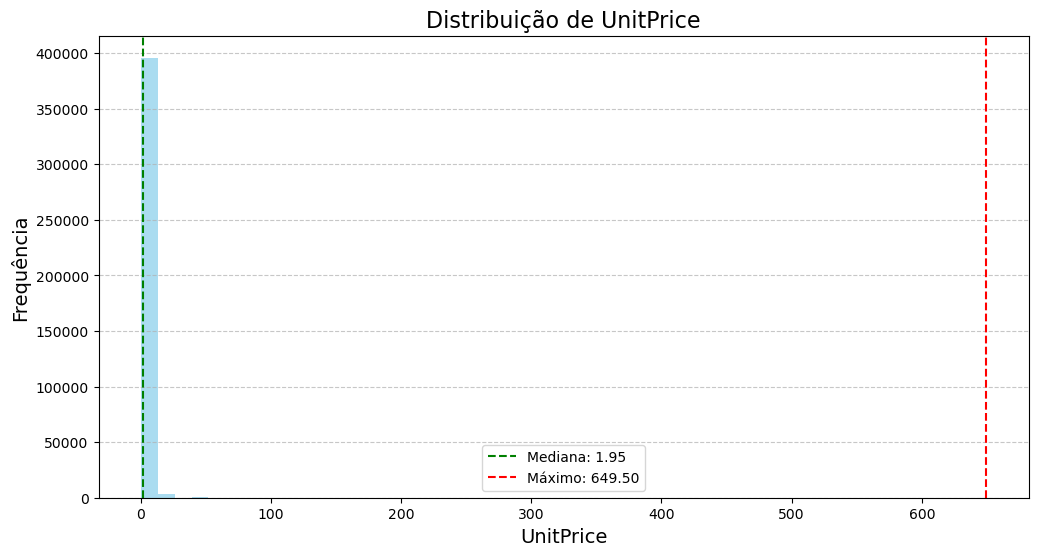

In [41]:
# gerando histograma com as linhas da mediana e máximo
unit_price_median = customers_data_raw['UnitPrice'].median()
unit_price_max = customers_data_raw['UnitPrice'].max()

plt.figure(figsize=(12, 6))
plt.hist(customers_data_raw['UnitPrice'], bins=50, color='skyblue', alpha=0.7)
plt.axvline(unit_price_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {unit_price_median:.2f}')
plt.axvline(unit_price_max, color='red', linestyle='dashed', linewidth=1.5, label=f'Máximo: {unit_price_max:.2f}')
plt.title('Distribuição de UnitPrice', fontsize=16)
plt.xlabel('UnitPrice', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1.2.3.2. Distribuição e valores atípicos

###### **Pedidos por usuário**

In [42]:
# contando número de pedidos por usuário
orders_per_user = customers_data_raw.groupby('CustomerID')['InvoiceNo'].nunique()

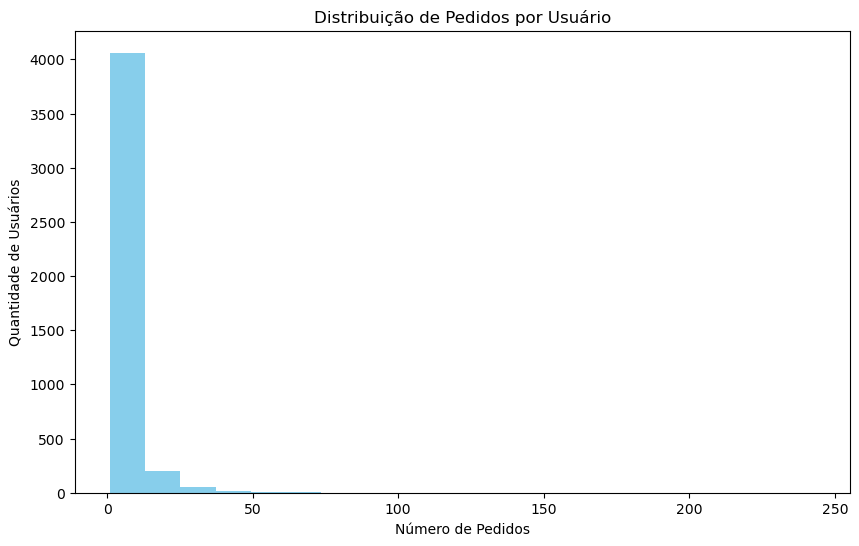

In [43]:
# criando um histograma para visualizar distribuição
plt.figure(figsize=(10, 6))
plt.hist(orders_per_user, bins=20, color='skyblue')
plt.title('Distribuição de Pedidos por Usuário')
plt.xlabel('Número de Pedidos')
plt.ylabel('Quantidade de Usuários')
plt.show()

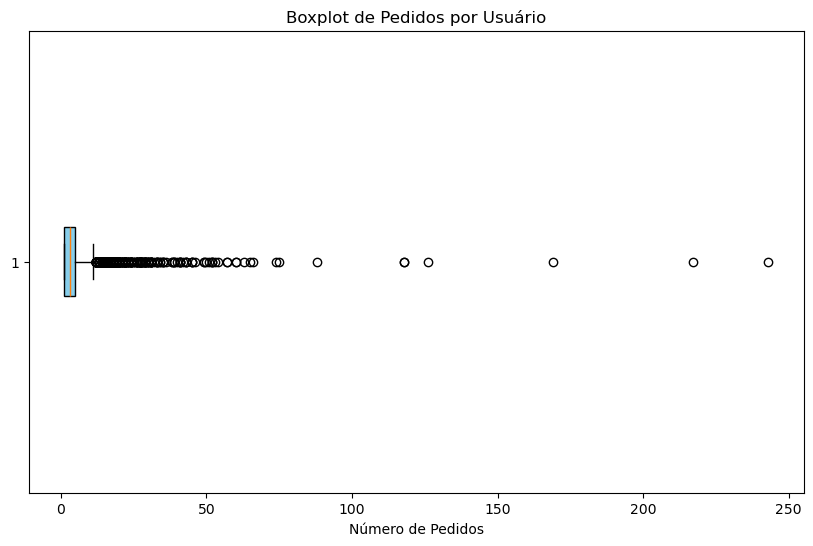

In [44]:
# criando boxplot (com Matplotlib)
plt.figure(figsize=(10, 6))
plt.boxplot(orders_per_user, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot de Pedidos por Usuário')
plt.xlabel('Número de Pedidos')
plt.show()

###### **Receita por usuário**

In [45]:
# somando receita total por usuário
value_per_user = customers_data_raw.groupby('CustomerID')['TotalValue'].sum()

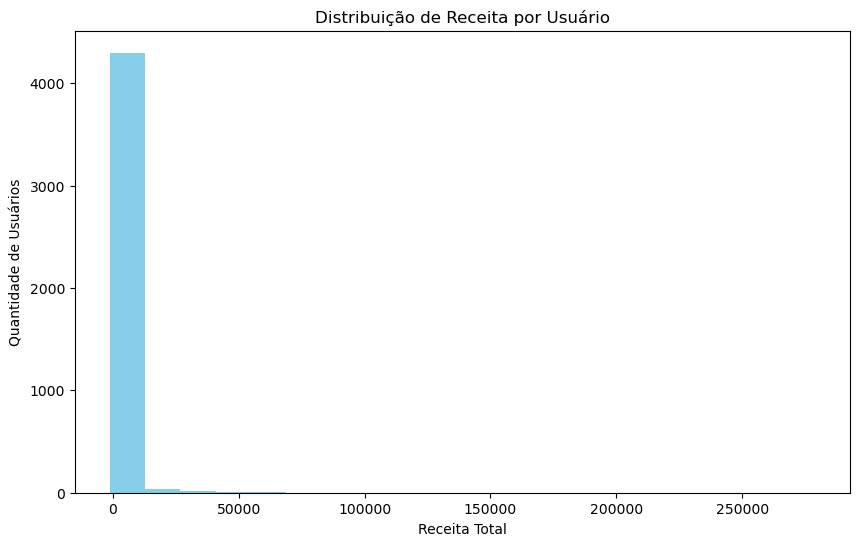

In [46]:
# criando um histograma para visualizar distribuição
plt.figure(figsize=(10, 6))
plt.hist(value_per_user, bins=20, color='skyblue')
plt.title('Distribuição de Receita por Usuário')
plt.xlabel('Receita Total')
plt.ylabel('Quantidade de Usuários')
plt.show()

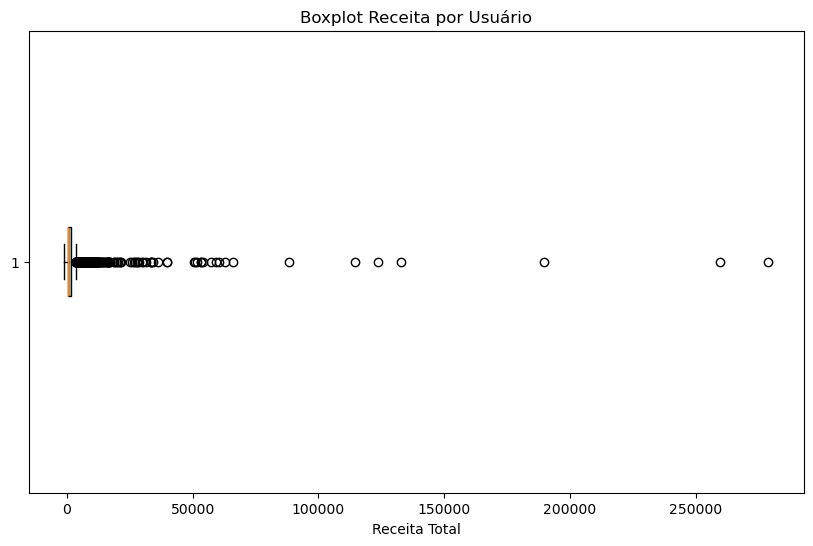

In [47]:
# criando boxplot (com Matplotlib)
plt.figure(figsize=(10, 6))
plt.boxplot(value_per_user, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot Receita por Usuário')
plt.xlabel('Receita Total')
plt.show()

#### 1.2.4. Data Frame final

In [48]:
# salvando DataFrame final após tratamento dos dados
customers_data = customers_data_raw

In [49]:
# visualizando dados
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399835 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    399835 non-null  object        
 1   StockCode    399835 non-null  object        
 2   Description  399835 non-null  object        
 3   Quantity     399835 non-null  int64         
 4   InvoiceDate  399835 non-null  datetime64[ns]
 5   UnitPrice    399835 non-null  float64       
 6   CustomerID   399835 non-null  int32         
 7   TotalValue   399835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(3)
memory usage: 25.9+ MB


In [50]:
# visualizando dados
customers_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34


In [51]:
# visualizando dados
customers_data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalValue
108551,545545,22041,"RECORD FRAME 7"" SINGLE SIZE",1,2019-03-01 15:02:00,2.55,17841,2.55
340228,566616,85034C,3 ROSE MORRIS BOXED CANDLES,4,2019-09-12 08:35:00,4.25,12895,17.00
78330,542865,22605,WOODEN CROQUET GARDEN SET,1,2019-01-30 12:08:00,14.95,12929,14.95
381563,569866,22561,WOODEN SCHOOL COLOURING SET,1,2019-10-04 14:50:00,1.65,12757,1.65
37430,539464,22473,TV DINNER TRAY VINTAGE PAISLEY,1,2018-12-17 11:35:00,4.95,17913,4.95
8131,537126,21486,PINK HEART DOTS HOT WATER BOTTLE,2,2018-12-03 12:13:00,3.75,18118,7.50
356186,568046,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2019-09-21 12:16:00,3.75,18118,3.75
216928,555858,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,12,2019-06-05 14:12:00,0.85,14911,10.20
403348,571562,22852,DOG BOWL VINTAGE CREAM,4,2019-10-16 10:04:00,4.25,14156,17.00
84147,543370,22853,CAT BOWL VINTAGE CREAM,6,2019-02-05 14:51:00,3.25,12359,19.50


In [52]:
# visualizando dados
customers_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalValue
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2019-12-07 12:50:00,4.95,12680,14.85


#### 1.2.5. Conclusões EDA

Após tratamento dos dados:
- **Remoção de 135.080 registros** com `CustomerID` nulo.
- **Exclusão de 5.225 registros duplicados.**
- **Exclusão de itens** relacionados a operações (e não produtos) e transações com `UnitPrice` igual a zero.

---

**InvoiceNo e StockCode:**
- Há transações onde `InvoiceNo` contém código com letras, estes itens correspondem a operações como **cancelamento, desconto.**
  - Estes itens foram **mantidos.**
- Ao analisar `StockCode`, identificou-se códigos não numéricos que correspondem a operações (como **postagem, envio**) e não a produtos.
  - Estas linhas foram **excluídas**, uma vez que não contam para a análise de consumo/compras dos usuários.

---

**Valores negativos em Quantity:**
- Há itens com valor negativo, correspondentes a **cancelamentos ou devoluções.**
- Esses registros **não foram removidos**, pois são úteis para capturar a dinâmica de reversões e possíveis problemas operacionais.
- Foi criada a coluna `TotalValue`, onde multiplica-se a `Quantity` por `UnitPrice`.

---

**Análise de preços (UnitPrice):**
- A maioria dos produtos tem preços **baixos** (mediana de **1,95**).
- O valor máximo do preço unitário (**649,50**) indica a presença de **itens de alto valor agregado.**

---

**Distribuição de Pedidos por Usuário:**
- A maioria dos usuários realizou **poucos pedidos**, como evidenciado pelo histograma fortemente enviesado para a esquerda.
- Alguns usuários, representados como valores **atípicos** no boxplot, realizaram um número muito elevado de pedidos.

---

**Distribuição de Receita por Usuário:**
- Semelhante ao número de pedidos, a maior parte dos usuários gerou **receitas baixas.**
- Alguns usuários apresentam receitas **extremamente altas**, visíveis no boxplot como **outliers.**


## 2. Segmentação de usuários - RFM

### 2.1. Cálculo das métricas

#### **Recency**

In [53]:
# definindo a data de referência (última data no DataFrame)
reference_date = customers_data['InvoiceDate'].max()

In [54]:
# calculando a métrica 'recency' (dias desde a última compra)
recency = customers_data.groupby('CustomerID').agg(LastPurchaseDate=('InvoiceDate', 'max'))
recency['Recency'] = (reference_date - recency['LastPurchaseDate']).dt.days

In [55]:
# visualizando dados
recency.head()

,LastPurchaseDate,Recency
CustomerID,,
12346,2019-01-16 10:17:00,325
12347,2019-12-05 15:52:00,1
12348,2019-09-23 13:13:00,74
12349,2019-11-19 09:51:00,18
12350,2019-01-31 16:01:00,309


In [56]:
# visualizando dados
recency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 12346 to 18287
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   LastPurchaseDate  4363 non-null   datetime64[ns]
 1   Recency           4363 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 85.2 KB


In [57]:
# conferindo número de 'CustomerID' do DataFrame original (o DataFrame 'recency' deve conter o mesmo número de entradas)
customers_data['CustomerID'].nunique()

4363

#### **Frequency**

In [58]:
# agrupando por 'CustomerID' e contando o número de 'InvoiceNo' unívocos
frequency = customers_data.groupby('CustomerID').agg(Frequency=('InvoiceNo', 'nunique'))

In [59]:
# visualizando dados
frequency.head()

,Frequency
CustomerID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [60]:
# visualizando dados
frequency.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 12346 to 18287
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Frequency  4363 non-null   int64
dtypes: int64(1)
memory usage: 51.1 KB


#### **Monetary Value**

In [61]:
# agrupando por 'CustomerID' e somando 'TotalValue'
monetary_value = customers_data.groupby('CustomerID').agg(MonetaryValue=('TotalValue', 'sum'))

In [62]:
# visualizando dados
monetary_value.head()

,MonetaryValue
CustomerID,
12346,0.00
12347,4310.00
12348,1437.24
12349,1457.55
12350,294.40


In [63]:
# visualizando dados
monetary_value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 12346 to 18287
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MonetaryValue  4363 non-null   float64
dtypes: float64(1)
memory usage: 51.1 KB


#### **DF RFM**

In [64]:
# juntando os DataFrames de Recency, Frequency e MonetaryValue
rfm = recency.join(frequency).join(monetary_value)

In [65]:
# resentando o índice para incluir CustomerID como coluna
rfm.reset_index(inplace=True)

In [66]:
# visualizando dados
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4363 non-null   int32         
 1   LastPurchaseDate  4363 non-null   datetime64[ns]
 2   Recency           4363 non-null   int64         
 3   Frequency         4363 non-null   int64         
 4   MonetaryValue     4363 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 153.5 KB


In [67]:
# visualizando dados
rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,MonetaryValue
0,12346,2019-01-16 10:17:00,325,2,0.00
1,12347,2019-12-05 15:52:00,1,7,4310.00
2,12348,2019-09-23 13:13:00,74,4,1437.24
3,12349,2019-11-19 09:51:00,18,1,1457.55
4,12350,2019-01-31 16:01:00,309,1,294.40


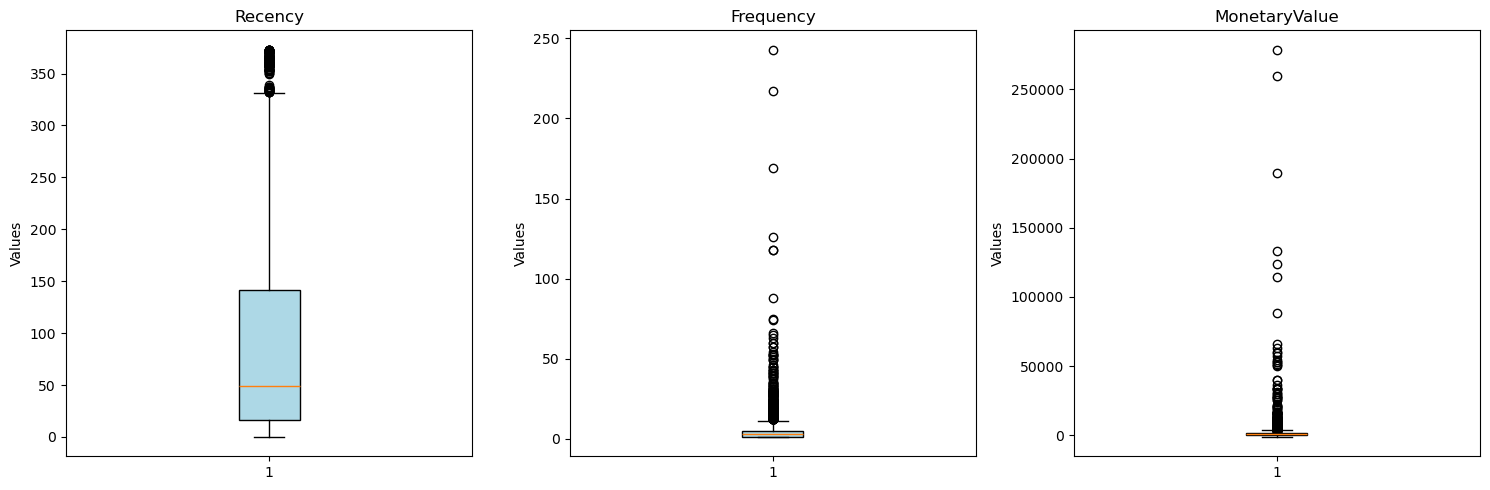

In [68]:
# imprimindo boxplots para Recency, Frequency e MonetaryValue
plt.figure(figsize=(15, 5))

for i, column in enumerate(["Recency", "Frequency", "MonetaryValue"], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(rfm[column], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(column)
    plt.ylabel("Values")

plt.tight_layout()
plt.show()

### 2.2. Clusterização - RFM

#### 2.2.1. Pontuação

In [69]:
def rfm_score(series, reverse=False):
    """
    Atribui uma pontuação de 1 a 3 com base em tercis.
    Parâmetro reverse inverte a ordem (ex.: Recency é inverso: menor = melhor).
    """
    try:
        # Aplicar qcut com 3 bins
        bins = pd.qcut(series, 3, labels=[3, 2, 1] if reverse else [1, 2, 3], duplicates='drop')
    except ValueError:
        print(f"Aviso: Não foi possível dividir em 3 bins para a coluna {series.name}.")
        return pd.Series([1] * len(series))  # Fallback para valor fixo
    
    return bins.astype(int)

In [70]:
# classificando 'Recency'
rfm['RecencyScore'] = rfm_score(rfm['Recency'], reverse=True)

In [71]:
# classificando 'Frequency'
rfm['FrequencyScore'] = rfm_score(rfm['Frequency'], reverse=False)

In [72]:
# classificando 'MonetaryValue'
rfm['MonetaryScore'] = rfm_score(rfm['MonetaryValue'], reverse=False)

In [73]:
# definindo pontuação RFM final
rfm['RFMScore'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

In [74]:
# visualizando dados
rfm.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346,2019-01-16 10:17:00,325,2,0.00,1,1,1,111
1,12347,2019-12-05 15:52:00,1,7,4310.00,3,3,3,333
2,12348,2019-09-23 13:13:00,74,4,1437.24,2,2,3,223
3,12349,2019-11-19 09:51:00,18,1,1457.55,3,1,3,313
4,12350,2019-01-31 16:01:00,309,1,294.40,1,1,1,111


#### 2.2.2. Segmentos

In [75]:
# classificação de segmentos
def classify_segment(row):
    if row['RFMScore'] == '333':
        return 'Top'
    elif row['RFMScore'] == '222':
        return 'Promising'
    elif row['RecencyScore'] == 1 and row['FrequencyScore'] == 1:
        return 'At Risk'
    else:
        return 'Outros'

In [76]:
# aplicando a classificação ao DataFrame RFM
rfm['Segment'] = rfm.apply(classify_segment, axis=1)

In [77]:
# visualizando dados
rfm.head(10)

,CustomerID,LastPurchaseDate,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
0,12346,2019-01-16 10:17:00,325,2,0.00,1,1,1,111,At Risk
1,12347,2019-12-05 15:52:00,1,7,4310.00,3,3,3,333,Top
2,12348,2019-09-23 13:13:00,74,4,1437.24,2,2,3,223,Outros
3,12349,2019-11-19 09:51:00,18,1,1457.55,3,1,3,313,Outros
4,12350,2019-01-31 16:01:00,309,1,294.40,1,1,1,111,At Risk
5,12352,2019-11-01 14:37:00,35,8,1265.41,2,3,3,233,Outros
6,12353,2019-05-17 17:47:00,203,1,89.00,1,1,1,111,At Risk
7,12354,2019-04-19 13:11:00,231,1,1079.40,1,1,2,112,At Risk
8,12355,2019-05-07 13:49:00,213,1,459.40,1,1,2,112,At Risk
9,12356,2019-11-15 08:40:00,22,3,2487.43,3,2,3,323,Outros


#### 2.2.3. Matriz RFM

In [78]:
# criando matriz RFM 
rfm_matrix = rfm.groupby("Segment").agg({
    "Recency": "mean",
    "Frequency": "mean",
    "MonetaryValue": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "CustomerCount"})

# ordenando os segmentos pelo tamanho do segmento
rfm_matrix = rfm_matrix.sort_values(by="MonetaryValue", ascending=True)

# arredondando os resultados para duas casas decimais
rfm_matrix = rfm_matrix.round(2)

rfm_matrix

,Recency,Frequency,MonetaryValue,CustomerCount
Segment,,,,
At Risk,229.27,1.31,375.10,1095
Promising,49.02,3.41,726.01,190
Outros,55.46,3.68,1131.74,2370
Top,7.97,15.53,7120.58,708


##### Matriz Normalizada

In [79]:
# separando as colunas que precisam ser normalizadas
cols_to_normalize = ['Recency', 'Frequency', 'MonetaryValue']

# inicializando MinMaxScaler
scaler = MinMaxScaler()

# normalizando
rfm_matrix[cols_to_normalize] = scaler.fit_transform(rfm_matrix[cols_to_normalize])

# arredondando os resultados para duas casas decimais
rfm_matrix[cols_to_normalize] = rfm_matrix[cols_to_normalize].round(2)

rfm_matrix

,Recency,Frequency,MonetaryValue,CustomerCount
Segment,,,,
At Risk,1.00,0.00,0.00,1095
Promising,0.19,0.15,0.05,190
Outros,0.21,0.17,0.11,2370
Top,0.00,1.00,1.00,708


#### 2.2.4. Heatmap

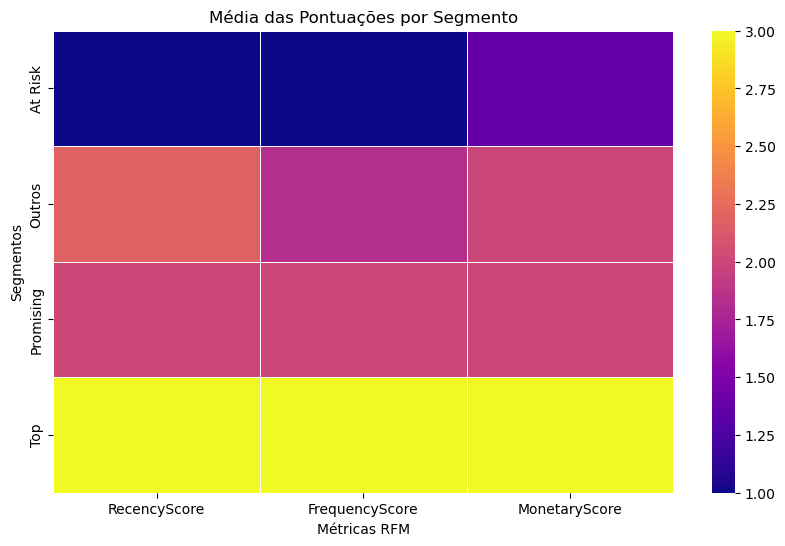

In [80]:
# selecionar colunas
rfm_matrix_score = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore', 'Segment']]

# agrupando por 'Segment' e calculando a média das pontuações
grouped_scores = rfm_matrix_score.groupby('Segment').mean()

# gerando heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_scores, cmap='plasma', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Média das Pontuações por Segmento")
plt.xlabel("Métricas RFM")
plt.ylabel("Segmentos")
plt.show()

### 2.3. K-Means

#### 2.3.0. Normalização dos dados

In [81]:
# selecionando colunas necessárias para o K-Means
rfm_features = rfm[['Recency', 'Frequency', 'MonetaryValue']]

In [82]:
# normalizando os valores das métricas
scaler = MinMaxScaler()
rfm_normalized = scaler.fit_transform(rfm_features)

#### 2.3.1. Determinando número de clusters

##### 2.3.1.1. Elbow Method

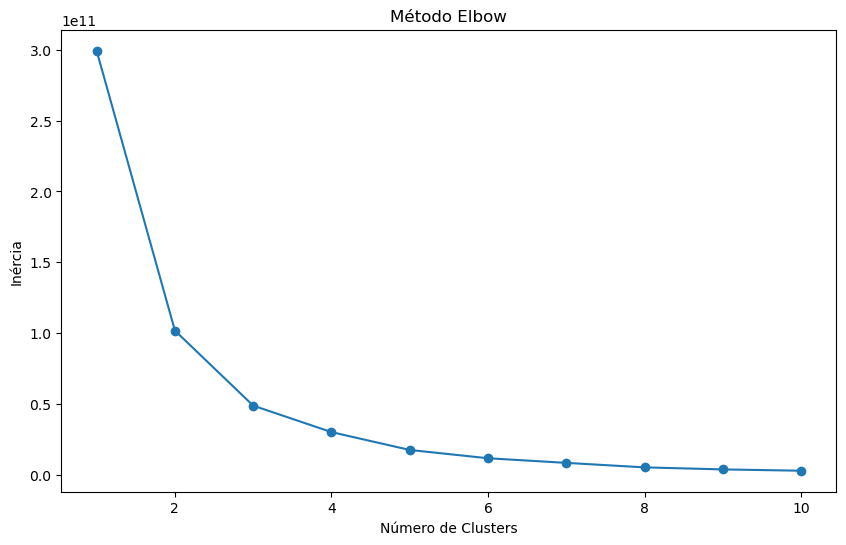

In [83]:
# selecionando apenas as colunas numéricas (Recency, Frequency e MonetaryValue)
rfm_numerical = rfm[['Recency', 'Frequency', 'MonetaryValue']]

# lista para armazenar as inércias
inertias = []

# testando diferentes números de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Define explicitamente n_init
    kmeans.fit(rfm_numerical)
    inertias.append(kmeans.inertia_)

# plotando método Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

##### 2.3.1.2. Silhouete Score

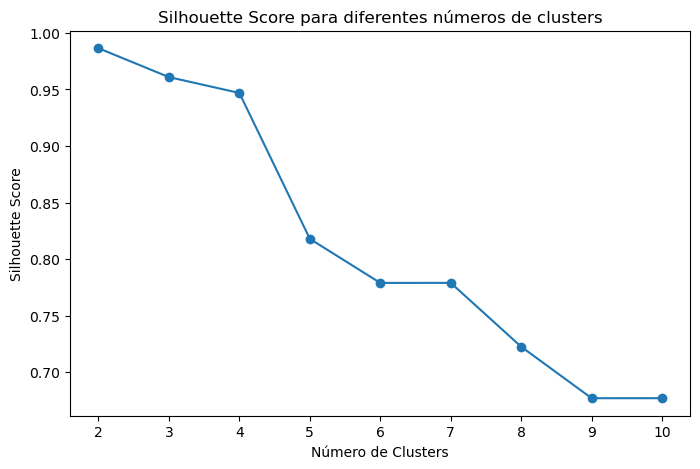

Número ideal de clusters (maior Silhouette Score): 2


In [84]:
# lista para armazenar os Silhouette Scores
silhouette_scores = []

# testando diferentes números de clusters
for k in range(2, 11):  # Começa de 2 porque silhouette não é definido para k=1
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_numerical)
    score = silhouette_score(rfm_numerical, cluster_labels)
    silhouette_scores.append(score)

# plotando os Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# número ideal de clusters com base no maior Silhouette Score
best_k = np.argmax(silhouette_scores) + 2  # +2 porque o range começa em 2
print(f"Número ideal de clusters (maior Silhouette Score): {best_k}")


#### 2.3.2. Segmentação

In [85]:
# aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=50, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)

In [86]:
# analisando os clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=['Recency', 'Frequency', 'MonetaryValue'])
cluster_sizes = rfm['Cluster'].value_counts()

# exibindo informações
print("Centros dos clusters:")
print(cluster_centers)
print("\nTamanho de cada cluster:")
print(cluster_sizes)

Centros dos clusters:
      Recency  Frequency  MonetaryValue
0   30.121834   6.429158    2535.022033
1  294.577287   1.545741     403.327902
2  152.013631   2.522924     754.936382

Tamanho de cada cluster:
Cluster
0    2923
2     806
1     634
Name: count, dtype: int64


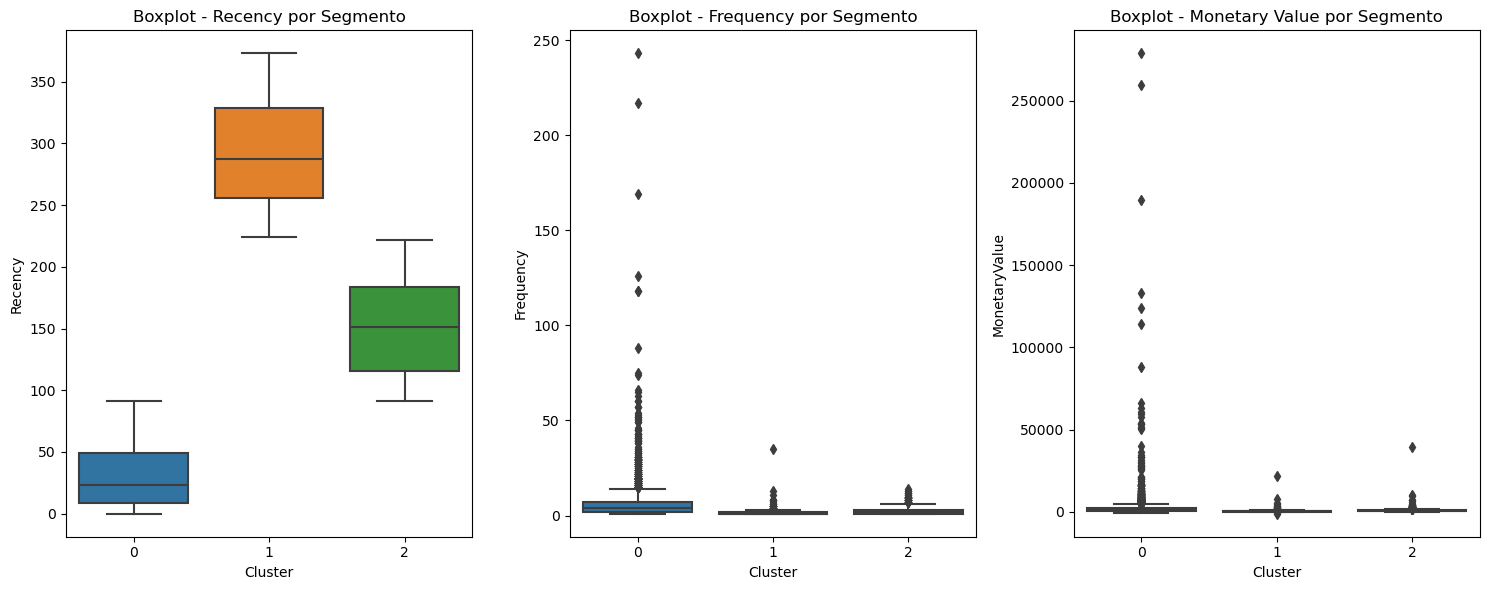

In [87]:
# imprimindo boxplot para Recency, Frequency, MonetaryValue por segmento
plt.figure(figsize=(15, 6))

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='Recency', data=rfm)
plt.title('Boxplot - Recency por Segmento')
plt.xticks

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Frequency', data=rfm)
plt.title('Boxplot - Frequency por Segmento')
plt.xticks

# MonetaryValue Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='MonetaryValue', data=rfm)
plt.title('Boxplot - Monetary Value por Segmento')
plt.xticks

plt.tight_layout()
plt.show()


##### 2.2.2.1. Gráficos

###### **Recency vs Monetary Value**

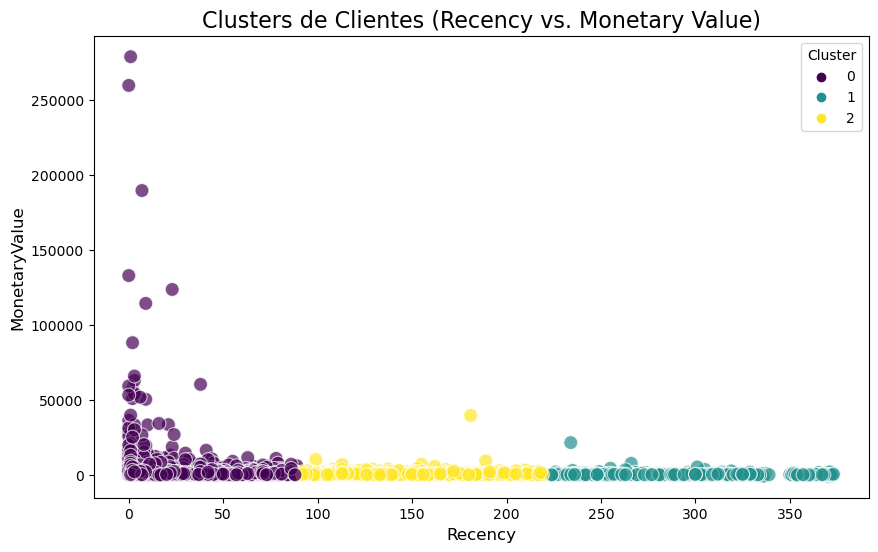

In [88]:
# adicionando as colunas de 'cluster' 
rfm['Cluster'] = kmeans.labels_

# criando um gráfico de dispersão para visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='MonetaryValue', hue='Cluster', data=rfm, palette='viridis', s=100, alpha=0.7)

# título e rótulos
plt.title('Clusters de Clientes (Recency vs. Monetary Value)', fontsize=16)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('MonetaryValue', fontsize=12)

# exibindo a legenda
plt.legend(title='Cluster', loc='upper right')

# exibindo o gráfico
plt.show()

###### **Frequency vs Monetary Value**

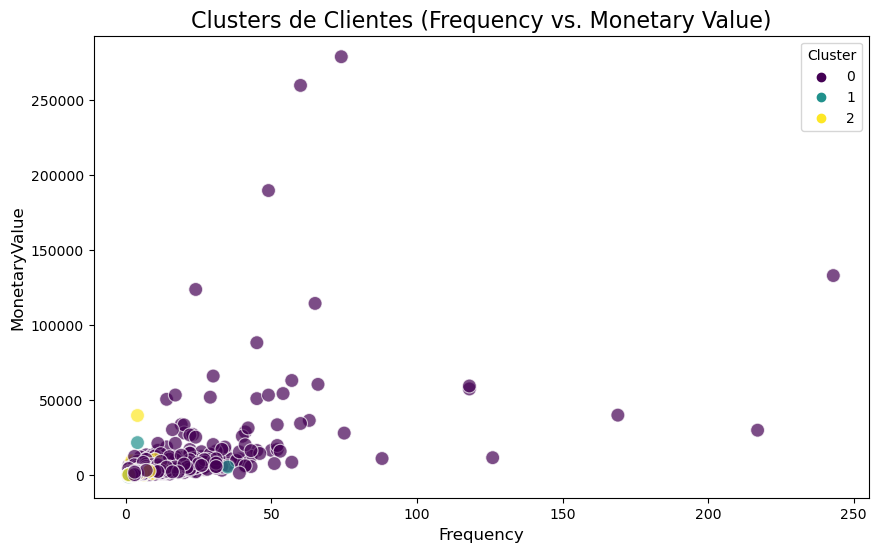

In [89]:
# adicionando as colunas de 'cluster' 
rfm['Cluster'] = kmeans.labels_

# criando um gráfico de dispersão para visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='MonetaryValue', hue='Cluster', data=rfm, palette='viridis', s=100, alpha=0.7)

# título e rótulos
plt.title('Clusters de Clientes (Frequency vs. Monetary Value)', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('MonetaryValue', fontsize=12)

# exibindo a legenda
plt.legend(title='Cluster', loc='upper right')

# exibindo o gráfico
plt.show()

###### **Recency vs Frequency**

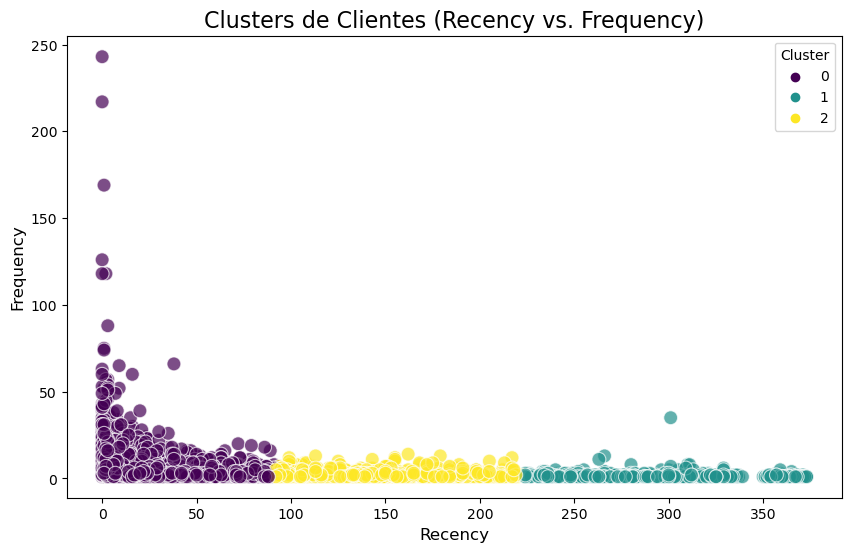

In [90]:
# adicionando as colunas de 'cluster' 
rfm['Cluster'] = kmeans.labels_

# criando um gráfico de dispersão para visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis', s=100, alpha=0.7)

# título e rótulos
plt.title('Clusters de Clientes (Recency vs. Frequency)', fontsize=16)
plt.xlabel('Recency', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# exibindo a legenda
plt.legend(title='Cluster', loc='upper right')

# exibindo o gráfico
plt.show()

### 2.4. Análise dos segmentos

**Segmentos Identificados**

**1. Top**
- **Características:**
  - Melhor desempenho em Recency, Frequency e Monetary Value.
  - Representa os clientes mais valiosos e engajados.
- **Indicadores:**
  - **Recency:** 7.97 (mais recente)
  - **Frequency:** 15.53 (maior frequência)
  - **Monetary Value:** 7120.58 (maior gasto médio)
- **Tamanho:** 708 clientes.
- **Ações Recomendadas:**
  - Fidelização através de benefícios exclusivos, como programas de recompensa e descontos personalizados.
  - Agradecimentos como e-mails personalizados ou brindes para consolidar a relação.

**2. Promising**
- **Características:**
  - Bom potencial de crescimento, ainda em ascensão.
- **Indicadores:**
  - **Recency:** 49.02 (tempo razoavelmente curto desde a última compra)
  - **Frequency:** 3.41
  - **Monetary Value:** 726.01.
- **Tamanho:** 190 clientes.
- **Ações Recomendadas:**
  - Enviar campanhas de marketing direcionadas para aumentar frequência e gasto médio.
  - Oferecer incentivos como promoções limitadas para estimular mais compras.

**3. At Risk**
- **Características:**
  - Clientes que fizeram compras há muito tempo e gastaram menos.
  - Alto risco de perda.
- **Indicadores:**
  - **Recency:** 229.27 (alta, ou seja, tempo longo sem comprar)
  - **Frequency:** 1.31
  - **Monetary Value:** 375.10.
- **Tamanho:** 1095 clientes.
- **Ações Recomendadas:**
  - Campanhas de reativação, como descontos em compras futuras.
  - Contato por e-mail ou mensagens destacando novos produtos ou promoções.

**4. Outros**
- **Características:**
  - Clientes com comportamento médio/heterogêneo, não destacados pelos outros critérios.
- **Indicadores:**
  - **Recency:** 55.46
  - **Frequency:** 3.68
  - **Monetary Value:** 1131.74.
- **Tamanho:** 2370 clientes.
- **Ações Recomendadas:**
  - Explorar padrões de comportamento e promover campanhas de segmentação para tentar identificar potenciais de crescimento.

---

**Clusterização por K-Means**

Os clusters também fornecem insights adicionais:

- **Cluster 0 (Top performers):**
  - Representa 2923 clientes com maior valor monetário médio.

- **Cluster 1 (Clientes com alta Recency):**
  - 634 clientes em risco de churn.

- **Cluster 2 (Clientes medianos):**
  - 806 clientes com performance estável, mas sem características extremas.


## 3. Testes de hipóteses

### 3.1. Hipótese 1: Valor monetário médio por segmento

Hipótese Nula (H₀): O valor monetário médio (MonetaryValue) é igual entre os diferentes segmentos de clientes.  
Hipótese Alternativa (H₁): Existe pelo menos uma diferença significativa no valor monetário médio entre os segmentos.

In [91]:
# agrupando MonetaryValue por segmento para realizar o teste ANOVA
monetary_by_segment = rfm.groupby('Segment')['MonetaryValue'].apply(list)

# realizando o teste ANOVA
f_stat, p_value = stats.f_oneway(*monetary_by_segment)

# definindo nível de significância
alpha = 0.05

# exibindo resultados e a conclusão
print(f"Estatística F: {f_stat}")
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa no valor monetário médio entre os segmentos.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há diferença significativa no valor monetário médio entre os segmentos.")

Estatística F: 123.8699349645232
P-valor: 5.398313873780952e-77
Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa no valor monetário médio entre os segmentos.


### 3.2. Hipótese 2: Frequência de compra por segmento

Hipótese Nula (H₀): A frequência média de compra (Frequency) é igual entre os segmentos.  
Hipótese Alternativa (H₁): Existe pelo menos uma diferença significativa na frequência média de compra entre os segmentos.

In [92]:
# agrupando Frequency por segmento para realizar o teste ANOVA
frequency_by_segment = rfm.groupby('Segment')['Frequency'].apply(list)

# realizando o teste ANOVA
f_stat_frequency, p_value_frequency = stats.f_oneway(*frequency_by_segment)

# definindo o nível de significância
alpha = 0.05

# exibindo resultados e a conclusão
print(f"Estatística F (Frequência): {f_stat_frequency}")
print(f"P-valor (Frequência): {p_value_frequency}")

if p_value_frequency < alpha:
    print("Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa na frequência de compra média entre os segmentos.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há diferença significativa na frequência de compra média entre os segmentos.")

Estatística F (Frequência): 541.9306246524817
P-valor (Frequência): 2.5366174684122633e-299
Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa na frequência de compra média entre os segmentos.


### 3.3. Hipótese 3: Recência média por segmento

Hipótese Nula (H₀): O tempo médio desde a última compra (Recency) é igual entre os segmentos.  
Hipótese Alternativa (H₁): Existe pelo menos uma diferença significativa no tempo médio desde a última compra entre os segmentos.

In [93]:
# agrupando Recency por segmento para realizar o teste ANOVA
recency_by_segment = rfm.groupby('Segment')['Recency'].apply(list)

# Realizando o teste ANOVA para comparar a recência média entre os segmentos
f_stat_recency, p_value_recency = stats.f_oneway(*recency_by_segment)

# definindo o nível de significância
alpha = 0.05

# exibindo resultados e a conclusão
print(f"Estatística F (Recência): {f_stat_recency}")
print(f"P-valor (Recência): {p_value_recency}")

if p_value_recency < alpha:
    print("Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa na recência média entre os segmentos.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há diferença significativa na recência média entre os segmentos.")

Estatística F (Recência): 2771.7482830261356
P-valor (Recência): 0.0
Conclusão: Rejeitamos a hipótese nula. Existe uma diferença significativa na recência média entre os segmentos.


### 3.4. Hipótese 4: Tamanho do segmento (proporções)

Hipótese Nula (H₀): As proporções de clientes nos segmentos não diferem significativamente de uma distribuição uniforme.  
Hipótese Alternativa (H₁): As proporções de clientes nos segmentos diferem significativamente de uma distribuição uniforme.

In [94]:
# contando o número de clientes por segmento
segment_sizes = rfm['Segment'].value_counts()
segment_sizes

Segment
Outros       2370
At Risk      1095
Top           708
Promising     190
Name: count, dtype: int64

In [95]:
# número total de clientes
total_customers = len(rfm)
total_customers

4363

In [96]:
# proporções observadas (em relação ao total de clientes)
observed_proportions = segment_sizes / total_customers
observed_proportions

Segment
Outros       0.543204
At Risk      0.250974
Top          0.162274
Promising    0.043548
Name: count, dtype: float64

In [97]:
# definindo a distribuição esperada (caso houvesse uma distribuição uniforme)
expected_proportions = np.array([1/4] * len(segment_sizes))

# realizando o teste de qui-quadrado para comparar as proporções observadas e esperadas
chi2_stat, p_value = stats.chisquare(segment_sizes, f_exp=expected_proportions * total_customers)

# definindo o nível de significância
alpha = 0.05

# exibindo os resultados e a conclusão
print(f"Estatística do qui-quadrado: {chi2_stat}")
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Conclusão: Rejeitamos a hipótese nula. A distribuição do tamanho dos segmentos é significativamente diferente da distribuição esperada (uniforme).")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a distribuição do tamanho dos segmentos seja diferente da distribuição esperada (uniforme).")


Estatística do qui-quadrado: 2378.498051799221
P-valor: 0.0
Conclusão: Rejeitamos a hipótese nula. A distribuição do tamanho dos segmentos é significativamente diferente da distribuição esperada (uniforme).


### 3.5. Hipótese 5: Impacto dos Segmentos nos Gastos Totais

Hipótese Nula (H₀): O segmento de um cliente não afeta significativamente o gasto total (TotalValue).  
Hipótese Alternativa (H₁): O segmento de um cliente afeta significativamente o gasto total (TotalValue).

In [98]:
# agrupando os dados por segmento e calculando os gastos totais
segment_gastos = rfm.groupby('Segment')['MonetaryValue'].mean()

In [99]:
# dividindo os dados de acordo com os segmentos
segment_data = [rfm[rfm['Segment'] == segment]['MonetaryValue'] for segment in rfm['Segment'].unique()]

In [100]:
# realizando teste ANOVA 
f_stat, p_value = stats.f_oneway(*segment_data)

# definindo o nível de significância
alpha = 0.05

# exibindo resultados e a conclusão
print(f"Estatística F: {f_stat}")
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Conclusão: Rejeitamos a hipótese nula. Há uma diferença significativa nos gastos totais entre os segmentos.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. Não há diferença significativa nos gastos totais entre os segmentos.")

Estatística F: 123.8699349645232
P-valor: 5.398313873780952e-77
Conclusão: Rejeitamos a hipótese nula. Há uma diferença significativa nos gastos totais entre os segmentos.


### 3.6. Conclusões

Os testes confirmaram diferenças estatisticamente significativas entre os segmentos nos principais indicadores. Estes são os principais aprendizados para embasar as ações de marketing:

**Valor Monetário Médio**
- **Conclusão:** Existe uma diferença significativa entre os segmentos no gasto médio.
- **Ação:** Direcionar ofertas mais atrativas para grupos como *Promising* e *At Risk*, enquanto mantém o alto nível de personalização para *Top*.

**Frequência de Compras**
- **Conclusão:** A frequência média de compras varia entre os segmentos.
- **Ação:** Desenvolver incentivos para aumentar a frequência nos grupos *Promising* e *At Risk*. Para *Outros*, buscar identificar clientes com potencial de ascensão.

**Recência**
- **Conclusão:** A recência média também apresenta diferenças significativas.
- **Ação:** Priorizar campanhas de reengajamento nos grupos com alta recência, especialmente *At Risk*. Promover interações regulares com clientes *Top*.

**Distribuição de Segmentos**
- **Conclusão:** Os tamanhos dos segmentos são desiguais.
  - *Outros* é o maior segmento (54,32%), enquanto *Promising* é o menor (4,35%).
- **Ação:** Investir em estratégias para mover clientes dos grupos *Outros* e *Promising* para categorias de maior valor (*Top*).


## 4. Conclusões e diretrizes para o setor de marketing

**Segmentação dos Consumidores**  
Com base nos dados e análises realizadas, os segmentos identificados apresentam comportamentos distintos que demandam ações específicas. As diferenças significativas nos indicadores de *Recency*, *Frequency* e *Monetary Value* (confirmadas pelos testes estatísticos) reforçam a necessidade de estratégias direcionadas para cada grupo.

**Top**
- **Perfil:** Clientes mais valiosos e engajados.
- **Estratégias:**
  - **Fidelização:** Programas de recompensas exclusivos e personalizados para fortalecer a lealdade.
  - **Reconhecimento:** Enviar e-mails de agradecimento e mimos, como brindes ou acesso antecipado a produtos.
  - **Manutenção:** Monitorar constantemente a satisfação e criar experiências VIP.

**Promising**
- **Perfil:** Clientes com potencial de crescimento, em processo de ascensão.
- **Estratégias:**
  - **Engajamento:** Oferecer promoções limitadas para estimular frequência de compras.
  - **Upselling:** Destacar produtos complementares ou de maior valor.
  - **Educação:** Criar campanhas que mostrem os benefícios de fidelidade à marca.

**At Risk**
- **Perfil:** Clientes em risco de *churn*, com alta recência e baixa frequência.
- **Estratégias:**
  - **Reativação:** Enviar campanhas específicas com descontos agressivos ou ofertas exclusivas.
  - **Redescoberta:** Promover novos produtos ou coleções que atendam às preferências anteriores.
  - **Comunicação:** Enviar mensagens diretas (e-mails ou SMS) para recuperar a atenção.

**Outros**
- **Perfil:** Clientes medianos com comportamento heterogêneo.
- **Estratégias:**
  - **Exploração:** Investir em análises mais detalhadas para identificar padrões ocultos e oportunidades.
  - **Diversificação:** Criar campanhas variadas, testando diferentes abordagens para aumentar engajamento e valor médio.

---

**Diretrizes Gerais**
- **Alocação de Recursos:**
  - Concentrar esforços em reter o grupo *Top*.
  - Designar campanhas criativas e exclusivas para engajar *Promising*.
  - Implementar ações rápidas para salvar clientes *At Risk*.

- **Personalização:**
  - Utilizar dados de histórico para personalizar mensagens e ofertas.
  - Adotar ferramentas de automação que segmentem e ajustem campanhas automaticamente.

- **Medição e Monitoramento:**
  - Acompanhar continuamente os KPIs de *Recency*, *Frequency* e *Monetary Value* para avaliar o impacto das campanhas.
  - Atualizar a segmentação periodicamente para refletir mudanças no comportamento dos clientes.

Com essas estratégias, o setor de marketing poderá maximizar a retenção, engajamento e valor gerado pelos clientes em todos os segmentos.


## 5. Referências bibliográficas

PROVOST, Foster; FAWCETT, Tom. Data Science Para Negócios. São Paulo: Alta Books, 2016.  
  
BERRY, Michael J.A. ; LINOFF, Gordon S. Data Mining Techniques: For Marketing, Sales, and Customer Relationship Management. Indianapolis: Wiley Publishing, 2004.  
  
FARRIS, Paul W.; BENDLE, Neil T.; PFEIFER, Phillip E.; REIBSTEIN, David J. Marketing Metrics: The Manager's Guide to Measuring Marketing Performance. Upper Saddle River: Pearson Education, Inc.,2016.  
  
BRUNET, Olivier. Customer Segmentation K-Means Analysis. Disponível em: https://www.kaggle.com/code/obrunet/customer-segmentation-k-means-analysis. Acesso em: [26 de novembro de 2024].  
  
DEEPLAB, The. Exploring Customer Segmentation with RFM Analysis and K-Means Clustering. Disponível em: https://medium.com/thedeephub/exploring-customers-segmentation-with-rfm-analysis-and-k-means-clustering-118f9ffcd9f0. Acesso em: [26 de novembro de 2024].  
  
DATACAMP. Recency, Frequency and Monetary Value Analysis. Disponível em: https://campus.datacamp.com/courses/customer-segmentation-in-python/recency-frequency-and-monetary-value-analysis?ex=1. Acesso em: [26 de novembro de 2024].  
